Ejercicio 1

Load the MNIST dataset (introduced in Chapter 3) and split it into a training
set and a test set (take the first 60,000 instances for training, and the remaining
10,000 for testing). Train a random forest classifier on the dataset and time how
long it takes, then evaluate the resulting model on the test set. Next, use PCA
to reduce the dataset’s dimensionality, with an explained variance ratio of 95%.
Train a new random forest classifier on the reduced dataset and see how long it
takes. Was training much faster? Next, evaluate the classifier on the test set. How
does it compare to the previous classifier? Try again with an SGDClassifier.
How much does PCA help now?

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import numpy as np
from sklearn.linear_model import SGDClassifier

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
mnist["data"][:200]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
X, y = mnist.data, mnist.target

In [8]:
X.shape

(70000, 784)

In [9]:
y[1]

'0'

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
rnd_clf = RandomForestClassifier(n_estimators=50, random_state=42)

%time rnd_clf.fit(X_train, y_train)
# 7s

CPU times: user 23.9 s, sys: 50.3 ms, total: 24 s
Wall time: 24 s


RandomForestClassifier(n_estimators=50, random_state=42)

In [12]:
y_pred_rf = rnd_clf.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred_rf)

0.9669

In [14]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [15]:
x_reduced_test = pca.transform(X_test)

In [16]:
pca.components_ # Matriz de autovectores

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [ ]:
pca.explained_variance_ #Autovalores

In [18]:
141292**2/60000 #Autovalor = ((Valor Singular**2)/n-1))


332723.8210666667

In [ ]:
pca.singular_values_

In [20]:
X_reduced.shape

(60000, 154)

In [21]:
rnd_pca = RandomForestClassifier(n_estimators=50, random_state=42)

%time rnd_pca.fit(X_reduced, y_train)
# 22s

CPU times: user 1min 8s, sys: 101 ms, total: 1min 8s
Wall time: 1min 9s


RandomForestClassifier(n_estimators=50, random_state=42)

In [22]:
y_pred_pca = rnd_pca.predict(x_reduced_test)

In [23]:
accuracy_score(y_test, y_pred_pca)

0.9438

## SGD classifier

In [24]:
SGD = SGDClassifier(random_state=42)

In [25]:
SGD.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [26]:
y_pred_sgd= SGD.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred_sgd)

0.874

In [28]:
SGD_pca = SGDClassifier(random_state=42)

In [29]:
SGD_pca.fit(X_reduced, y_train)

SGDClassifier(random_state=42)

In [30]:
y_pred_pca_sgd = SGD_pca.predict(x_reduced_test)

In [31]:
accuracy_score(y_test, y_pred_pca_sgd)

0.8959

## Mostrando la curva

In [32]:
X_train, y_train = mnist.data[:1000], mnist.target[:1000]
#X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]


In [50]:
mi_lista = range(1,100)
for indice,elemento in enumerate(mi_lista):
    pca = PCA(n_components=elemento,svd_solver="randomized")
    pca.fit(X_train)
    varianza = np.cumsum(pca.explained_variance_ratio_)
print(elemento, varianza[-1])

99 0.9279032234778016


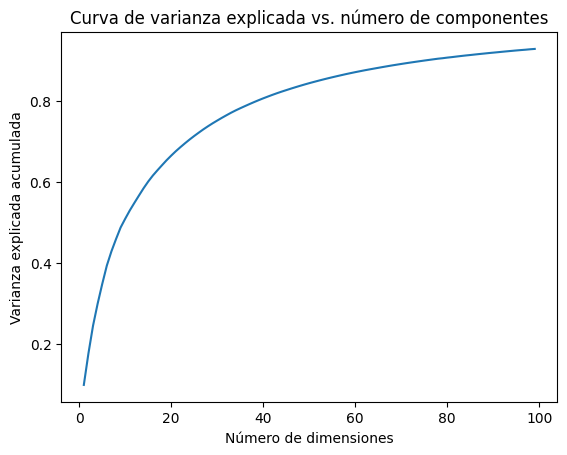

In [48]:
import matplotlib.pyplot as plt

X_train, y_train = mnist.data[:1000], mnist.target[:1000]

mi_lista = range(1, 100)
elementos = []
varianzas = []
for indice, elemento in enumerate(mi_lista):
    pca = PCA(n_components=elemento, svd_solver="randomized")
    pca.fit(X_train)
    varianza = np.cumsum(pca.explained_variance_ratio_)
    elementos.append(elemento)
    varianzas.append(varianza[-1])

plt.plot(elementos, varianzas)
plt.xlabel('Número de dimensiones')
plt.ylabel('Varianza explicada acumulada')
plt.title('Curva de varianza explicada vs. número de componentes')
plt.show()

In [46]:
zipped = zip(elementos, varianzas)

In [ ]:
list(zipped)

In [58]:
y_train[1]

'0'

In [54]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")


In [ ]:
for i in range(1,3):
    some_digit = X_train[i]
    plot_digit(some_digit)
    plt.show()



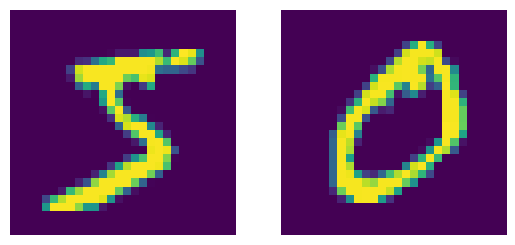

In [63]:
# prompt: Quiero imprimir los "some_digit" uno al lado del otro

def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image)
  plt.axis("off")

# Create a figure with subplots
fig, axes = plt.subplots(1, 2)  # Adjust the number of columns for more digits

# Loop through the digits you want to display
for i in range(2):
    some_digit = X_train[i]
    axes[i].imshow(some_digit.reshape(28, 28))
    axes[i].axis("off")

plt.show()